In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [94]:
df_noNA = df.dropna() 

**With this adult income information, I want to find out three things regarding of income in equality regarding to race**

1. I would like to find out whether if there race is a determining factor regarding of income equality.  That is wheter if black people make less money in general?
2. I would like to find out if black people generallly have lower education?
3. What is there to do?

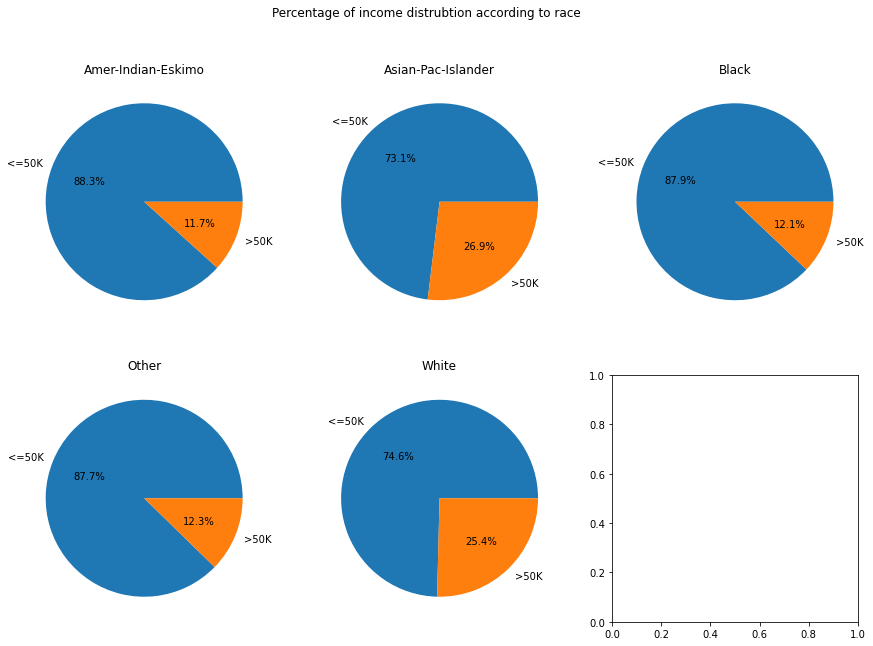

In [62]:
df_race_income = df_noNA.groupby(['race','income']).count().age.reset_index()
df_race_income.columns  = ['race','income','num_count']


fig, ax = plt.subplots(2,3, figsize=(15,10))
plt.suptitle('Percentage of income distrubtion according to race')
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        count = i*3 +j
        if count >= 5:
            break
        race = df_race_income.race.unique()
        number_count = df_race_income[df_race_income['race'] ==race[count]].num_count
        labels =  df_race_income[df_race_income['race'] ==race[count]].income
        ax[i,j].pie(number_count, labels = label, autopct='%.1f%%' )
        ax[i,j].set_title(race[count])
        
        
#sns.barplot(x='race', y= 'count', data = df_race_income, hue = df_race_income.income.to_list())

The result is striking.  White people only have ~25% of people more less than 50 K, while black, amer-indian-eskimo, and other only have around 12% of people more than 50K.  That is a difference of  2 folds

array(['Bachelors and High-ed', 'Preschool-highschool', 'Some-college'],
      dtype=object)

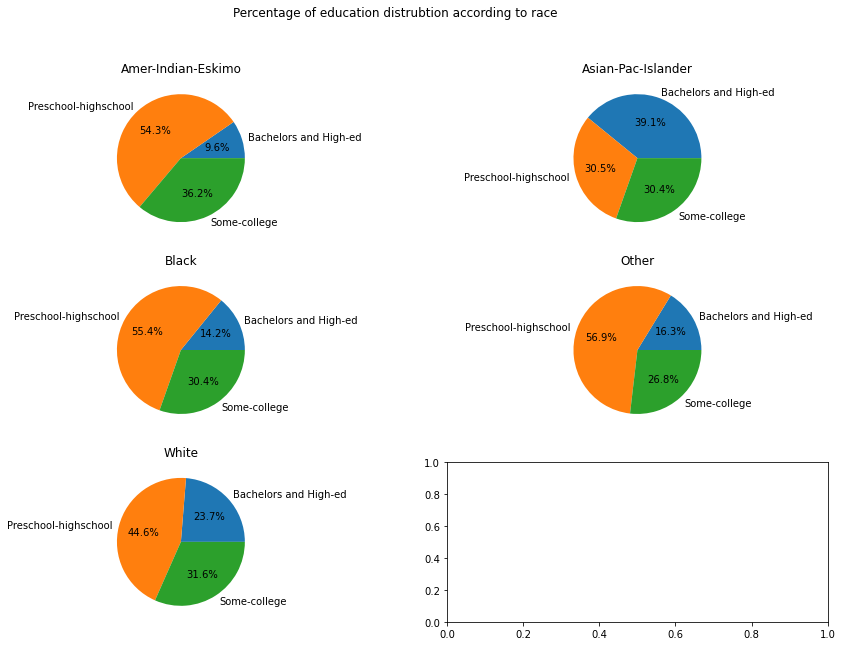

In [104]:
education_dict = {'1st-4th': 'Preschool-highschool', '5th-6th':'Preschool-highschool', '9th':'Preschool-highschool'
                  ,'10th':'Preschool-highschool','11th':'Preschool-highschool','12th':'Preschool-highschool'
                  , 'Preschool':'Preschool-highschool', 'HS-grad':'Preschool-highschool','Assoc-acdm' : 'Some-college'
                  , 'Assoc-voc': 'Some-college', 'Prof-school': 'Some-college', 'Some-college': 'Some-college'
                  , 'Bachelors' :'Bachelors and High-ed', 'Doctorate':'Bachelors and High-ed'
                  ,'Masters':'Bachelors and High-ed', '7th-8th':'Preschool-highschool'}

df_noNA['education'] = df_noNA.education.replace(education_dict)


df_race_education = df_noNA.groupby(['race','education']).count().age.reset_index()
df_race_education.columns  = ['race','education','num_count']




fig, ax = plt.subplots(3,2, figsize=(15,10))
plt.suptitle('Percentage of education distrubtion according to race')
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        count = i*2 +j
        if count >= 5:
            break
        race = df_race_income.race.unique()
        number_count = df_race_education[df_race_education['race'] ==race[count]].num_count
        labels =  df_race_education[df_race_education['race'] ==race[count]].education
        ax[i,j].pie(number_count, labels = labels, autopct='%.1f%%' )
        ax[i,j].set_title(race[count])

        
df_race_education.education.unique()


Ok base on the education pie chart.  It is clear that good education is closely related to higher income.  Here you can see that white and asisn, in general, are more highly educated.  This means more percentage of their people have some college experience and a good amount of people haave bachelors or higher education degree.  Wherea Black Amer-Indian-Eskimo and Others all roughly have 55 percentage people with education level with preschool - highschool.

**Now what is there to do?**

Clearly, it is unclear the issue here is whether if our educational system is failing the minority or in general black people are just reciving low wage, so why don't we look at only individual with higher incomes

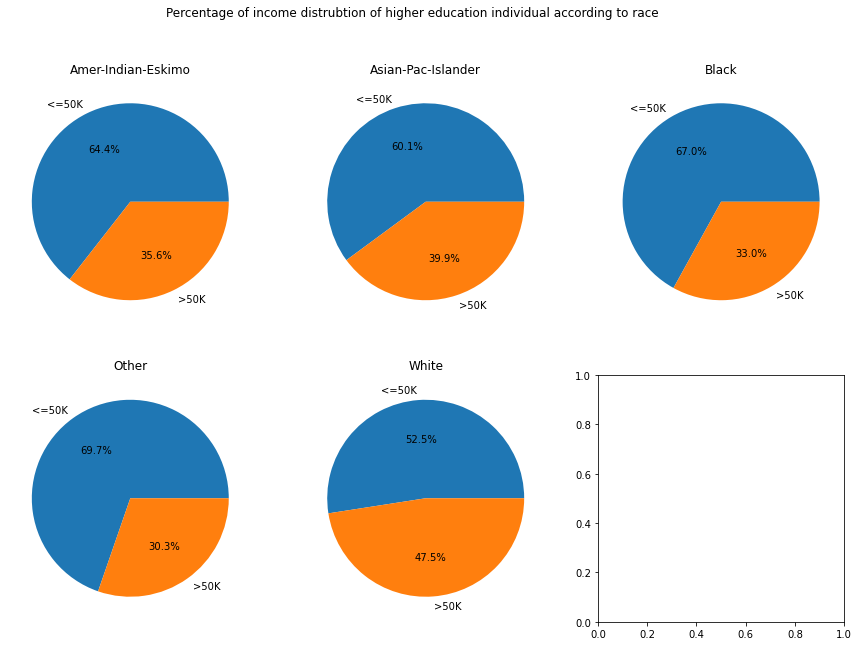

In [110]:
df_race_education_highed = df_noNA.groupby(['race','education','income']).count().age.reset_index()
df_race_education_highed.columns  = ['race','education','income','num_count']
df_race_education_highed = df_race_education_highed[df_race_education_highed['education']   == 'Bachelors and High-ed']

fig, ax = plt.subplots(2,3, figsize=(15,10))
plt.suptitle('Percentage of income distrubtion of higher education individual according to race')
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        count = i*3 +j
        if count >= 5:
            break
        race = df_race_education_highed.race.unique()
        number_count = df_race_education_highed[df_race_education_highed['race'] ==race[count]].num_count
        labels =  df_race_education_highed[df_race_education_highed['race'] ==race[count]].income
        ax[i,j].pie(number_count, labels = label, autopct='%.1f%%' )
        ax[i,j].set_title(race[count])
        

Even at higher income it seems like besides asian and white the discriminatory trend of income is still there.  (Although not as much)  Therefore, it is pretty obviously there there is some outside reason why adult of other race have lower income than Asian and white